# **Not an ideal network**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# import all the necessary libraries 

import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D,Dense
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
# load mnist data by keras api
# This does all the preprocessing while loading the data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


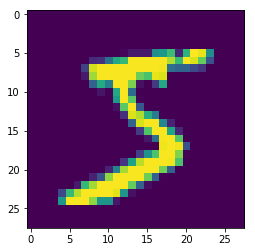

In [4]:
# pyplot is a python package used for plotting of images

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# reshaping train and test data to channel last format

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# 32 floating point precision and normalizing 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
# input_shape = (batch_size=32,width=28,height=28,num_channel=1(grayscale image)) 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # receptive field 3 x 3
model.add(Convolution2D(64, 3, 3, activation='relu')) # receptive field 5 x 5
model.add(Convolution2D(128, 3, 3, activation='relu')) # receptive field 7 x 7

model.add(MaxPooling2D(pool_size=(2, 2))) # receptive field 14 x 14


model.add(Convolution2D(256, 3, 3, activation='relu')) # receptive field 16 x 16
model.add(Convolution2D(512, 3, 3, activation='relu')) # receptive field 18 x 18
model.add(Convolution2D(1024, 3, 3, activation='relu')) # receptive field 20 x 20
model.add(Convolution2D(2048, 3, 3, activation='relu')) # receptive field 22x 22
model.add(Convolution2D(10, 3, 3, activation='relu')) # receptive field 24x 24

model.add(Flatten()) # creates a tensor of 1d
model.add(Activation('softmax')) # softmax activation is used to get a probabilty score of the total number of classes

model.summary() # prints model summary

W0729 08:53:49.349374 140563338692480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0729 08:53:49.368418 140563338692480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 08:53:49.373208 140563338692480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2048, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  app.launch_new_instance()


In [12]:
# loss function is categorical_crossentropy, based on loss function the weights are updated
# metric is used to judge the performance of the model after each epoch. Here we are using categorical_accuracy as metric, 
# before running we need to compile the model
# adam is a optimization algorithm which is used for weight updates

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0729 08:53:53.384696 140563338692480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 08:53:53.430578 140563338692480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0729 08:53:54.946086 140563338692480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 08:53:55.054955 140563338692480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 225s 4ms/step - loss: 2.3025 - acc: 0.0987
Epoch 2/10
60000/60000 [==============================] - 221s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 221s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 221s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[2.3025851249694824, 0.098]


In [45]:
# for layer in model.layers: 
#   if layer.name == 'conv2d_8': 
#     print(layer.get_weights())


[]


In [0]:
y_pred = model.predict(X_test)

In [47]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


In [0]:
# write comments here

From the output of the model we know that the model is not learning anything as it is predicting same value for every image.
The problem is we are using relu activation in the classification layer, If we replace that by softmax the model will perform better(better model (new_model) shown below).

Generally when training a classification network we add Fully connected layer at the end of convolution layer.
Because conv layers are good at picking up local features.
So we can think of conv layer, which breaks up 
image into features and fully connected layers are sort of global representation of all the merged features


In [26]:
# A Better model


######################## Not Used ##########################
# new_model = Sequential() 
# # input_shape = (batch_size=32,width=28,height=28,num_channel=1(grayscale image)) 
# new_model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # receptive field 3 x 3
# new_model.add(Convolution2D(64, 3, 3, activation='relu')) # receptive field 5 x 5
# new_model.add(Convolution2D(128, 3, 3, activation='relu')) # receptive field 7 x 7

# new_model.add(MaxPooling2D(pool_size=(2, 2))) # receptive field 14 x 14


# new_model.add(Convolution2D(256, 3, 3, activation='relu')) # receptive field 17 x 17
# new_model.add(Convolution2D(512, 3, 3, activation='relu')) # receptive field 19 x 19
# new_model.add(Convolution2D(1024, 3, 3, activation='relu')) # receptive field 21 x 21
# new_model.add(Convolution2D(2048, 3, 3, activation='relu')) # receptive field 23 x 23
# new_model.add(Flatten())
# new_model.add(Dense(10,activation='softmax')) # receptive field 25 x 25 
# new_model.summary()

###############################################################

new_model = Sequential() 
# input_shape = (batch_size=32,width=28,height=28,num_channel=1(grayscale image)) 
new_model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # receptive field 3 x 3
new_model.add(Convolution2D(64, 3, 3, activation='relu')) # receptive field 5 x 5
new_model.add(Convolution2D(128, 3, 3, activation='relu')) # receptive field 7 x 7

new_model.add(MaxPooling2D(pool_size=(2, 2))) # receptive field 14 x 14


new_model.add(Convolution2D(256, 3, 3, activation='relu')) # receptive field 16 x 16
new_model.add(Convolution2D(512, 3, 3, activation='relu')) # receptive field 18 x 18
new_model.add(Convolution2D(1024, 3, 3, activation='relu')) # receptive field 20 x 20
new_model.add(Convolution2D(2048, 3, 3, activation='relu')) # receptive field 22 x 22
new_model.add(Convolution2D(10, 3, 3, activation='softmax')) # receptive field 24 x 24 

new_model.add(Flatten())

new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3

In [27]:
new_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
new_model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/10
60000/60000 [==============================] - 224s 4ms/step - loss: 0.1554 - acc: 0.9519
Epoch 2/10
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0549 - acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0412 - acc: 0.9884
Epoch 4/10
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0339 - acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0274 - acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0256 - acc: 0.9924
Epoch 7/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0228 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0208 - acc: 0.9943
Epoch 9/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0204 - acc: 0.9947
Epoch 10/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0214 - a

In [46]:
new_score = new_model.evaluate(X_test, Y_test, verbose=0)
print(new_score)

[0.04860029649537992, 0.9898]


In [34]:
new_y_pred = new_model.predict(X_test)
print(new_y_pred[:1])
print(y_test[:1])

[[2.3143710e-15 1.9361442e-14 1.5381292e-11 6.5451273e-12 2.5137215e-15
  3.1968993e-16 1.2253053e-22 1.0000000e+00 6.6707716e-15 4.6857466e-11]]
[7]
